## 간호사 월급 예측

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

In [42]:
# 1. 데이터 불러오기
df = pd.read_csv('data/watson_healthcare_modified.csv')

# 1-1. 컬럼명을 한국어로 변경
df = df.rename(columns={
    'EmployeeID': '사원ID',
    'Age': '나이',
    'Attrition': '퇴사여부',                        # YES/NO
    'BusinessTravel': '출장빈도',                   # Travel_Rarely / Travel_Frequently / NON_Travel 
    'DailyRate': '일일급여',
    'Department': '부서',
    'DistanceFromHome': '출퇴근거리(km)',
    'Education': '교육수준',
    'EducationField': '전공분야',
    'EmployeeCount': '총직원수',
    'EnvironmentSatisfaction': '근무환경만족도',
    'Gender': '성별',
    'HourlyRate': '시급',
    'JobInvolvement': '직무몰입도',
    'JobLevel': '직급',
    'JobRole': '직무',
    'JobSatisfaction': '직무만족도',
    'MaritalStatus': '결혼상태',
    'MonthlyIncome': '월급',
    'MonthlyRate': '월별급여율',
    'NumCompaniesWorked': '이전근무회사수',
    'Over18': '성인여부',
    'OverTime': '초과근무여부',
    'PercentSalaryHike': '급여인상률(%)',
    'PerformanceRating': '성과등급',
    'RelationshipSatisfaction': '관계만족도',
    'StandardHours': '주당표준근무시간',
    'Shift': '근무조',
    'TotalWorkingYears': '총경력연수',
    'TrainingTimesLastYear': '연간교육횟수',
    'WorkLifeBalance': '워라밸지수',
    'YearsAtCompany': '회사근속연수',
    'YearsInCurrentRole': '현재직무근속연수',
    'YearsSinceLastPromotion': '마지막승진이후연수',
    'YearsWithCurrManager': '현매니저와근속연수'
})



In [43]:
# 2. 데이터 구조 및 기초 통계 확인
print("데이터 구조 정보:")
print(df.info())

print("기초 통계 요약:")
print(df.describe())

# 3. 결측치 및 이상치 탐색
print("결측치 확인:")           
print(df.isnull().sum())          # 결측치 없음

데이터 구조 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   사원ID       1676 non-null   int64 
 1   나이         1676 non-null   int64 
 2   퇴사여부       1676 non-null   object
 3   출장빈도       1676 non-null   object
 4   일일급여       1676 non-null   int64 
 5   부서         1676 non-null   object
 6   출퇴근거리(km)  1676 non-null   int64 
 7   교육수준       1676 non-null   int64 
 8   전공분야       1676 non-null   object
 9   총직원수       1676 non-null   int64 
 10  근무환경만족도    1676 non-null   int64 
 11  성별         1676 non-null   object
 12  시급         1676 non-null   int64 
 13  직무몰입도      1676 non-null   int64 
 14  직급         1676 non-null   int64 
 15  직무         1676 non-null   object
 16  직무만족도      1676 non-null   int64 
 17  결혼상태       1676 non-null   object
 18  월급         1676 non-null   int64 
 19  월별급여율      1676 non-null   int64 
 20  이전근무회사수    1676 non

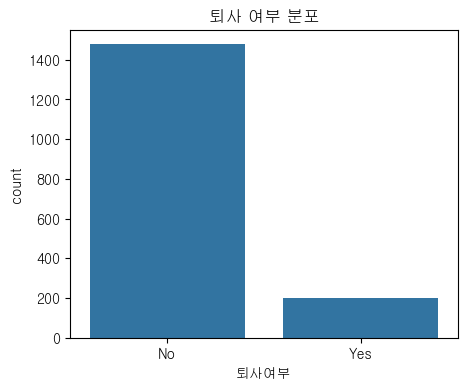

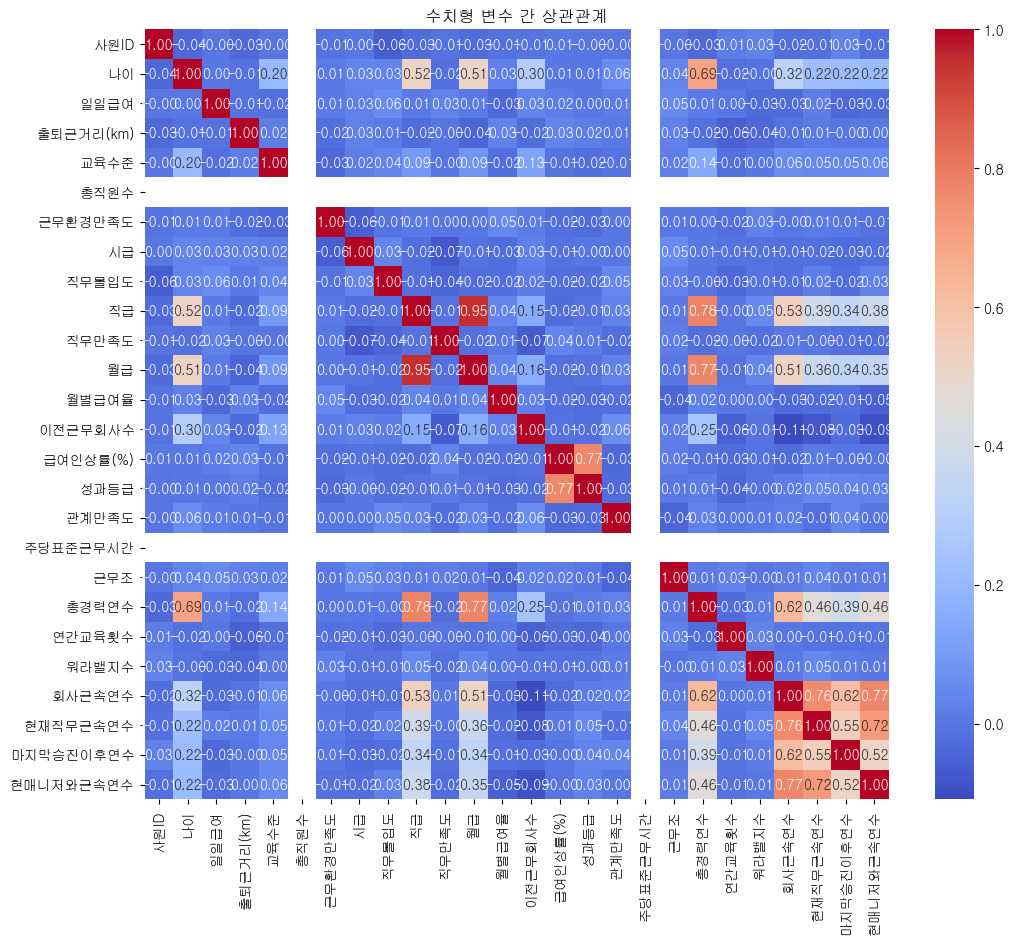

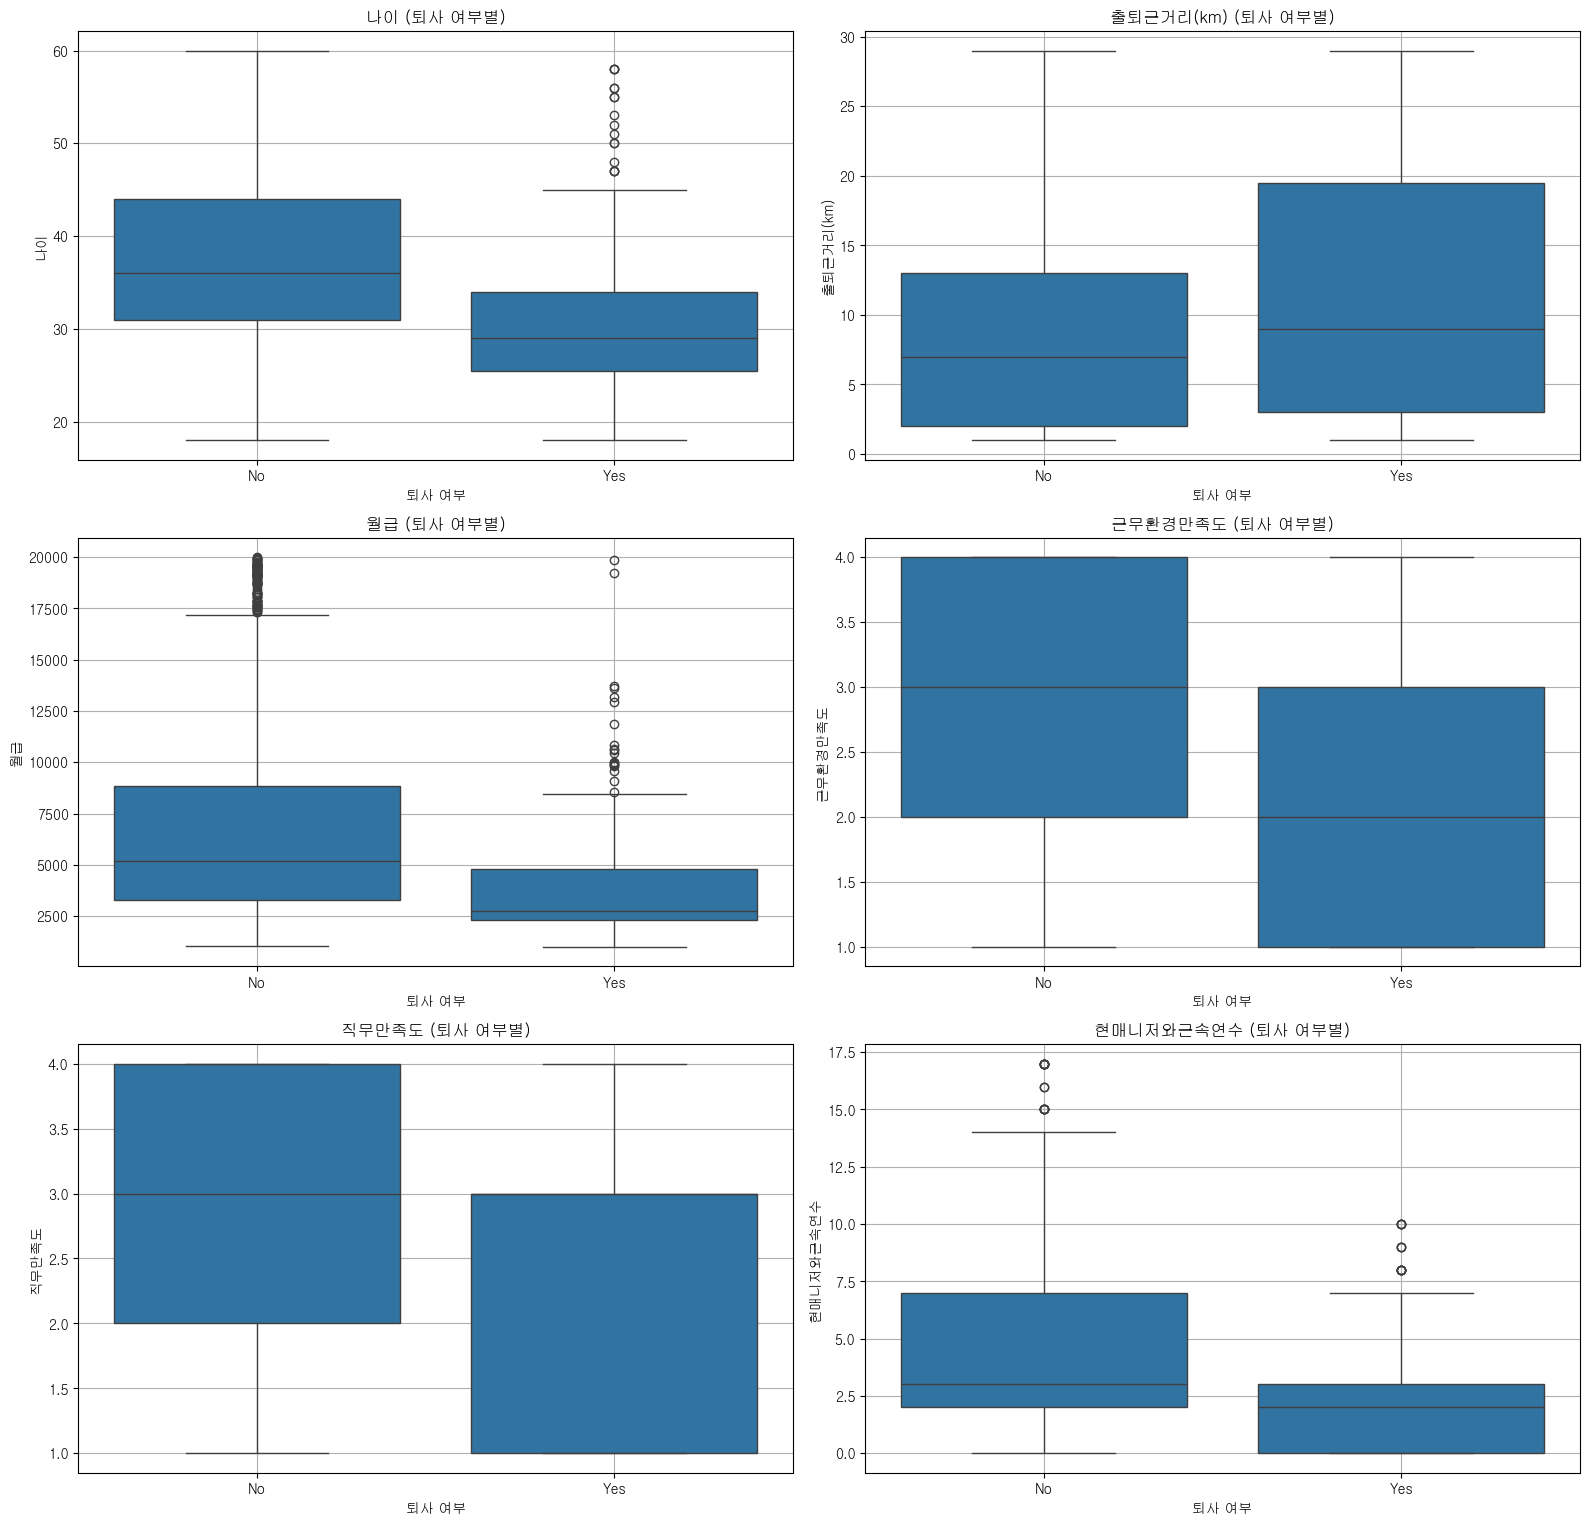

['Nurse']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   사원ID       822 non-null    int64 
 1   나이         822 non-null    int64 
 2   퇴사여부       822 non-null    object
 3   출장빈도       822 non-null    object
 4   일일급여       822 non-null    int64 
 5   부서         822 non-null    object
 6   출퇴근거리(km)  822 non-null    int64 
 7   교육수준       822 non-null    int64 
 8   전공분야       822 non-null    object
 9   총직원수       822 non-null    int64 
 10  근무환경만족도    822 non-null    int64 
 11  성별         822 non-null    object
 12  시급         822 non-null    int64 
 13  직무몰입도      822 non-null    int64 
 14  직급         822 non-null    int64 
 15  직무         822 non-null    object
 16  직무만족도      822 non-null    int64 
 17  결혼상태       822 non-null    object
 18  월급         822 non-null    int64 
 19  월별급여율      822 non-null    int64 
 20  이전근무회사수    822 non-nul

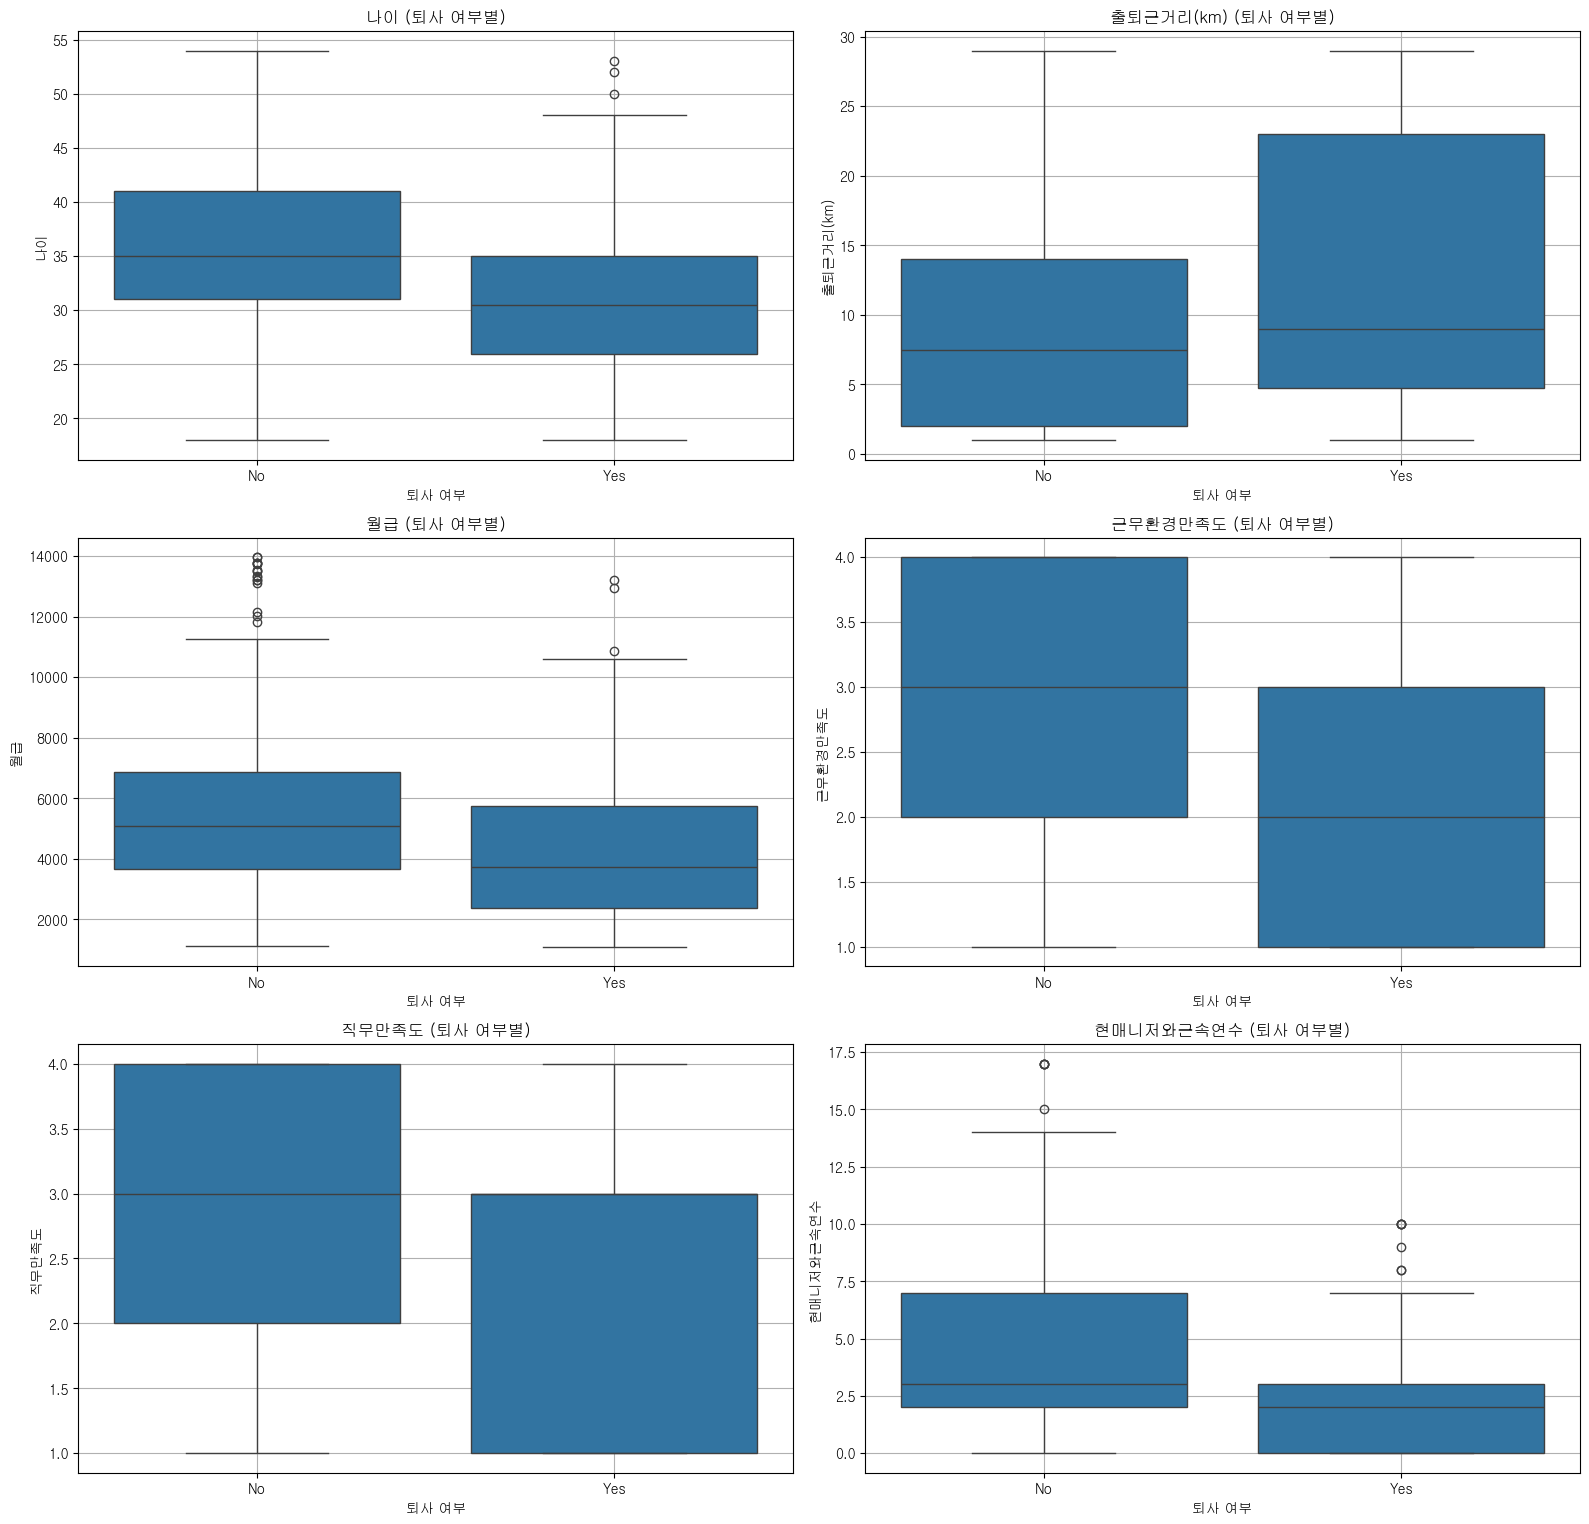

In [44]:
# 4. 데이터 시각화를 통한 탐색

# 퇴사여부 분포
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='퇴사여부')
plt.title("퇴사 여부 분포")
plt.show()


# 상관관계 히트맵
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("수치형 변수 간 상관관계")
plt.show()

numeric_cols = ['나이','출퇴근거리(km)','월급','근무환경만족도','직무만족도','현매니저와근속연수']
plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 2, i + 1)  # 4행 2열
    sns.boxplot(x='퇴사여부', y=col, data=df)
    plt.title(f"{col} (퇴사 여부별)")
    plt.xlabel("퇴사 여부")
    plt.ylabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()

# 데이터 전처리
# 1. 직업이 간호사인 데이터만 추출 (Other,Therapist,Administrative,Admin 제외)  1676명 --> 822명
df = df[df['직무'] == 'Nurse'].reset_index(drop=True)
print(df['직무'].unique())      # 간호사만 남기고 모두 제외

df.info()      # 822개의 데이터만 남은 것 확인

# 2. 이상치 제외 : 나이가 55세 이상인 간호사 ('월급이 적다'거나, '직무에 만족하지 못한다'거나 등 피처들로 인한 요인보다 나이로 인해 은퇴하는 것으로 추정) 
df = df[df['나이'] < 55].reset_index(drop=True)     # 822명 --> 794명
df.info()

# 이상치 처리 후 
numeric_cols = ['나이','출퇴근거리(km)','월급','근무환경만족도','직무만족도','현매니저와근속연수']
plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 2, i + 1)  # 4행 2열
    sns.boxplot(x='퇴사여부', y=col, data=df)
    plt.title(f"{col} (퇴사 여부별)")
    plt.xlabel("퇴사 여부")
    plt.ylabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 81, number of negative: 554
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 635, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.127559 -> initscore=-1.922716
[LightGBM] [Info] Start training from score -1.922716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:56:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_27252\1502611655.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_10_features, palette='coolwarm')


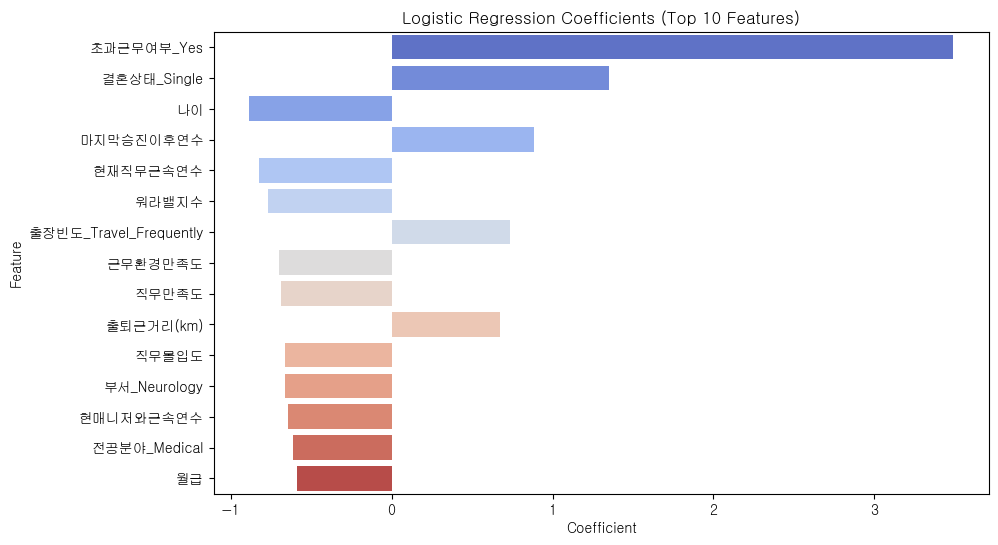

In [ ]:

# 데이터 분리/학습 및 평가 

# 피처에서 타겟 컬럼 제거
X = df.drop(columns=['퇴사여부'])

# 퇴사여부(YES/NO -> 1,0 숫자로 인코딩)
y = df['퇴사여부'].map({'Yes': 1, 'No': 0}) 

# 수치형 변수만 선택
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# 수치형 변수만 스케일링
scaler = StandardScaler()
X_scaled_numeric = scaler.fit_transform(X[numeric_cols])

# 스케일링한 것을 다시 DataFrame으로 변환
X_scaled_numeric = pd.DataFrame(X_scaled_numeric, columns=numeric_cols, index=X.index)

# 범주형 변수는 그대로 두고 결합
X_encoded = pd.concat([X_scaled_numeric, X.drop(columns=numeric_cols)], axis=1)

# 피처에 대해서만 원핫 인코딩
X_encoded = pd.get_dummies(X_encoded, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42)

#Lightbgm
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("LightGBM 정확도:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

#로지스틱 회귀
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Logistic Regression 정확도:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

#랜덤 포레스트
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Random Forest 정확도:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

#SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("SVM 정확도:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

#XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("XGBoost 정확도:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

############### 정규화 후 학습 ###############


# # 수치형 변수만 선택
# numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# # 수치형 변수만 스케일링
# scaler = StandardScaler()
# X_scaled_numeric = scaler.fit_transform(X[numeric_cols])

# # 스케일링한 것을 다시 DataFrame으로 변환
# X_scaled_numeric = pd.DataFrame(X_scaled_numeric, columns=numeric_cols, index=X.index)

# # 범주형 변수는 그대로 두고 결합
# X_encoded = pd.concat([X_scaled_numeric, X.drop(columns=numeric_cols)], axis=1)

# # # 피처에 대해서만 원핫 인코딩
# X_encoded = pd.get_dummies(X_encoded, drop_first=True)
# print(X_encoded)

# X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42)

#로지스틱 회귀(정규화 후)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 실제값과 예측값 비교
result_df = pd.DataFrame({
    '실제 퇴사여부': y_test.values,
    '예측 퇴사여부': y_pred
})

# 인덱스 정리 (옵션)
result_df.reset_index(drop=True, inplace=True)

# 상위 10개 샘플 출력
print(result_df)


print("Logistic Regression 정확도:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False)

print(coefficients)

import matplotlib.pyplot as plt
import seaborn as sns

# 절대값 기준으로 상위 10개 추출
top_10_features = coefficients.head(15)

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_10_features, palette='coolwarm')
plt.title('Logistic Regression Coefficients (Top 10 Features)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

# #SVC(정규화 후)
# from sklearn.svm import SVC

# model = SVC(kernel='rbf')
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("SVM 정확도:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test,y_pred))



# 인사이트
- '퇴사여부'에 가장 큰 영향을 끼치는 요소는 **'초과근무여부'** 이다.
- '결혼여부'가 '퇴사여부'에 두번째로 큰 영향을 끼친다.
- '나이'가 많을수록 퇴사할 확률이 적다.
- '마지막 승진 이후 근무 연수'가 길수록 퇴사할 확률이 크다.
- '출장빈도'가 많을수록 퇴사할 확률이 크다.
- '출퇴근거리'가 짧을수록 퇴사할 확률이 적다. 

# 제안 가능한 이탈 방지 방안
- 초과근무 줄이기.
- 승진 잘 시켜주기.
- 출장 줄이기

# 신규/경력 간호사 채용 시 
- 결혼을 했으며, 나이가 어느정도 있고, 병원과 가까운 곳에 거주하는 인원 채용